Problem Statement:
    
    The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000(US dollars)
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in 1000's(US Dollars)




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
column_names = ['crime_rates', 'land_zoned', 'nonretail_business', 'charles_river', 
                'NO2_ppm', 'avg_rooms', 'age', 'dist_empcenter', 'radial_highways', 
                'tax_per_10000', 'pupil_per_tacher', 'B', 'lower_status', 'median_house_value']
houses = pd.read_csv(r'housing.csv', header=None, delimiter=r"\s+", names=column_names )
houses.head(5)

,crime_rates,land_zoned,nonretail_business,charles_river,NO2_ppm,avg_rooms,age,dist_empcenter,radial_highways,tax_per_10000,pupil_per_tacher,B,lower_status,median_house_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime_rates         506 non-null    float64
 1   land_zoned          506 non-null    float64
 2   nonretail_business  506 non-null    float64
 3   charles_river       506 non-null    int64  
 4   NO2_ppm             506 non-null    float64
 5   avg_rooms           506 non-null    float64
 6   age                 506 non-null    float64
 7   dist_empcenter      506 non-null    float64
 8   radial_highways     506 non-null    int64  
 9   tax_per_10000       506 non-null    float64
 10  pupil_per_tacher    506 non-null    float64
 11  B                   506 non-null    float64
 12  lower_status        506 non-null    float64
 13  median_house_value  506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


    No missing data, 
    No incorrect dtypes, 
    total rows = 506, 
    total independant features = 13
    dependant feature - median_house_value
    No categorical features

In [5]:
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rates,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
land_zoned,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
nonretail_business,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
charles_river,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NO2_ppm,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
avg_rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dist_empcenter,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radial_highways,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax_per_10000,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Observations:

1. mean crime_rates is only 3.6 crimes but max value is 88.97, presence of outliers or some areas could have high crimes rates.
2. likewise land_zoned mean is only 11.36 where as max value seems to be 100, huge variation
    

In [6]:
houses.corr()

,crime_rates,land_zoned,nonretail_business,charles_river,NO2_ppm,avg_rooms,age,dist_empcenter,radial_highways,tax_per_10000,pupil_per_tacher,B,lower_status,median_house_value
crime_rates,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
land_zoned,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
nonretail_business,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
charles_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NO2_ppm,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
avg_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dist_empcenter,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
radial_highways,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax_per_10000,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Observation:
    
1. crime_rates has high correlationwith eadial_highways, crimes could be happening more around highways
2. crimes_rates also has some correlation with tax_per_10000 and lower_status. More people kiving with lower status, crimes are more.
3. non_retail business have correlations with NO2 being released. 
4. non_retail business also has correaltion with taxes per 10000 US dollars being paid.
5. Also has correlation with people with lower_status living in area
6. distance from employment centers have negative correlation with NO2 ppm. It means closer the employment centers(distance lesser), higher are the NO2 ppm released.
7. Also median house values are higher for houses with more rooms
8. NO2 ppm are higher as radial highways are well connected.
9. Also tax per 10000 us dollars being paid is higher for people staying closer by to highways or have connected highway roads.
10. median house values are lower where lower_status population is living

Lets see how our data is distributed

In [7]:
houses.skew().sort_values(ascending=False)

crime_rates           5.223149
charles_river         3.405904
land_zoned            2.225666
median_house_value    1.108098
dist_empcenter        1.011781
radial_highways       1.004815
lower_status          0.906460
NO2_ppm               0.729308
tax_per_10000         0.669956
avg_rooms             0.403612
nonretail_business    0.295022
age                  -0.598963
pupil_per_tacher     -0.802325
B                    -2.890374
dtype: float64

Observations:
    
positive skewness is gives us brief idea about presence of outliers in the data. it means even though majority of datapoints have lesser mean, 50th, 75th percentiles, there are some outliers / extreme values making our data skewed

Negative skewness means there are many values in data which are lesser than the median values. Hence distribution is such that more values concentrated on right but extreme values are on left

Let us visualize some of the features to see how they are distributed.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


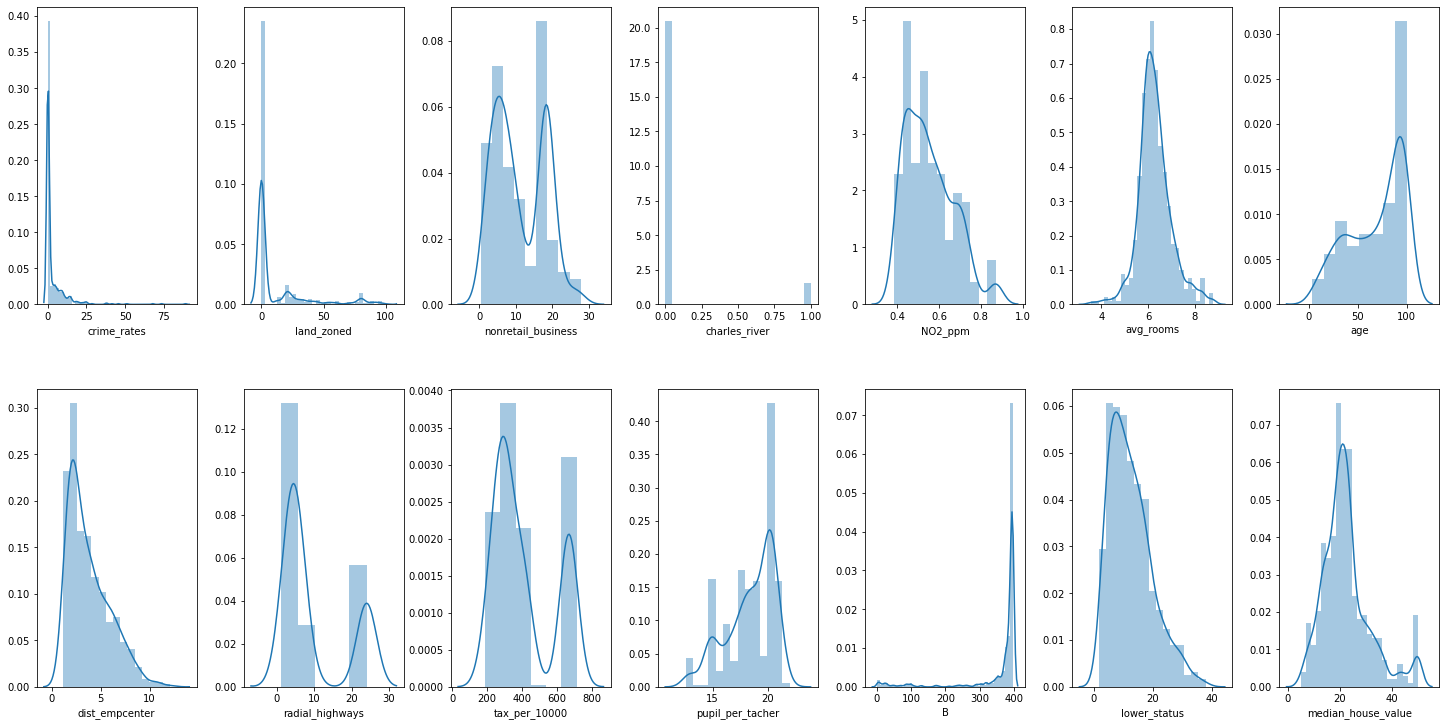

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

#define index and iterae over it to get to next plot
index = 0 

axs = axs.flatten()
for v in houses.columns:
    sns.distplot(houses[v], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

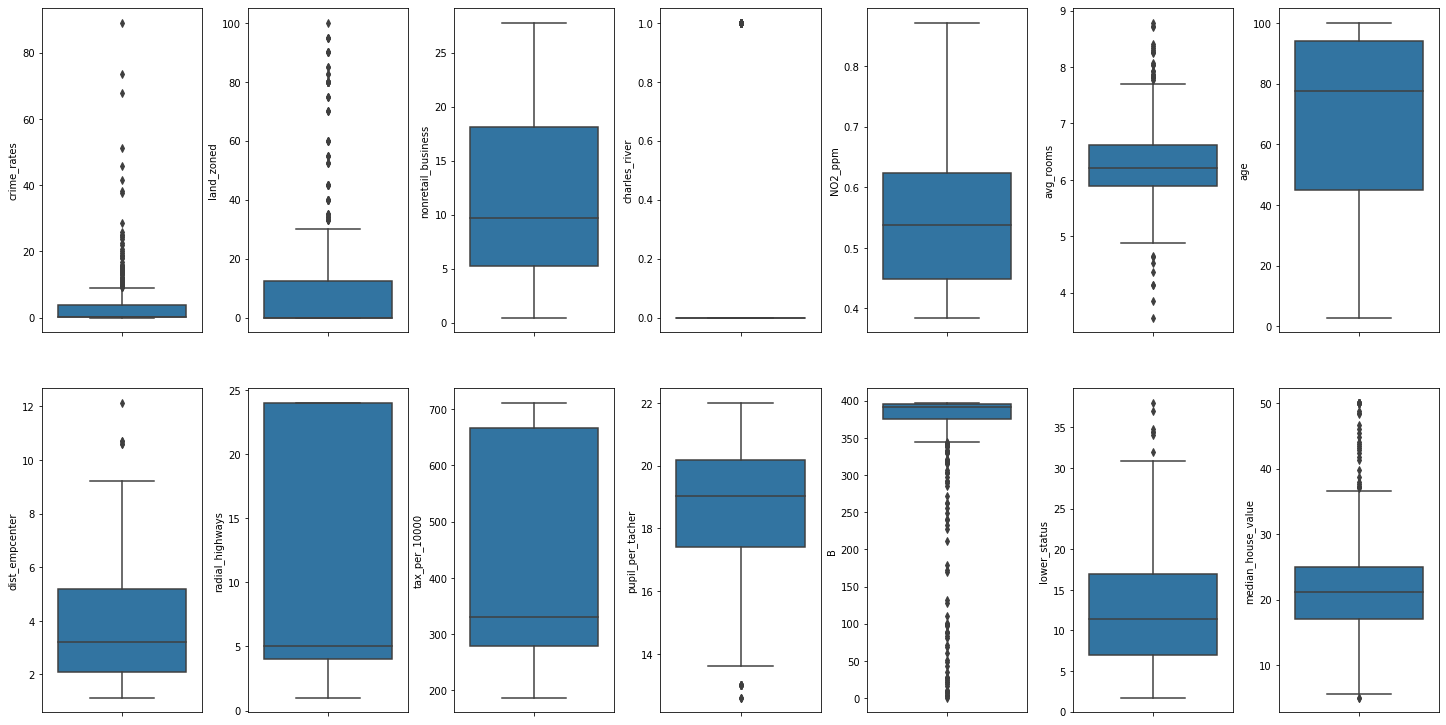

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

index = 0
axs = axs.flatten()
for k,v in houses.items():
    sns.boxplot(y=k, data=houses, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
houses.kurt().sort_values(ascending=False)

crime_rates           37.130509
charles_river          9.638264
B                      7.226818
land_zoned             4.031510
avg_rooms              1.891500
median_house_value     1.495197
lower_status           0.493240
dist_empcenter         0.487941
NO2_ppm               -0.064667
pupil_per_tacher      -0.285091
radial_highways       -0.867232
age                   -0.967716
tax_per_10000         -1.142408
nonretail_business    -1.233540
dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
minmaxscaler = MinMaxScaler()
cols = ['crime_rates', 'land_zoned', 'nonretail_business', 'charles_river',
       'NO2_ppm', 'avg_rooms', 'age', 'dist_empcenter', 'radial_highways',
       'tax_per_10000', 'pupil_per_tacher', 'B', 'lower_status']

X = houses[cols]
y = houses['median_house_value']

X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=cols)
X

,crime_rates,land_zoned,nonretail_business,charles_river,NO2_ppm,avg_rooms,age,dist_empcenter,radial_highways,tax_per_10000,pupil_per_tacher,B,lower_status
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


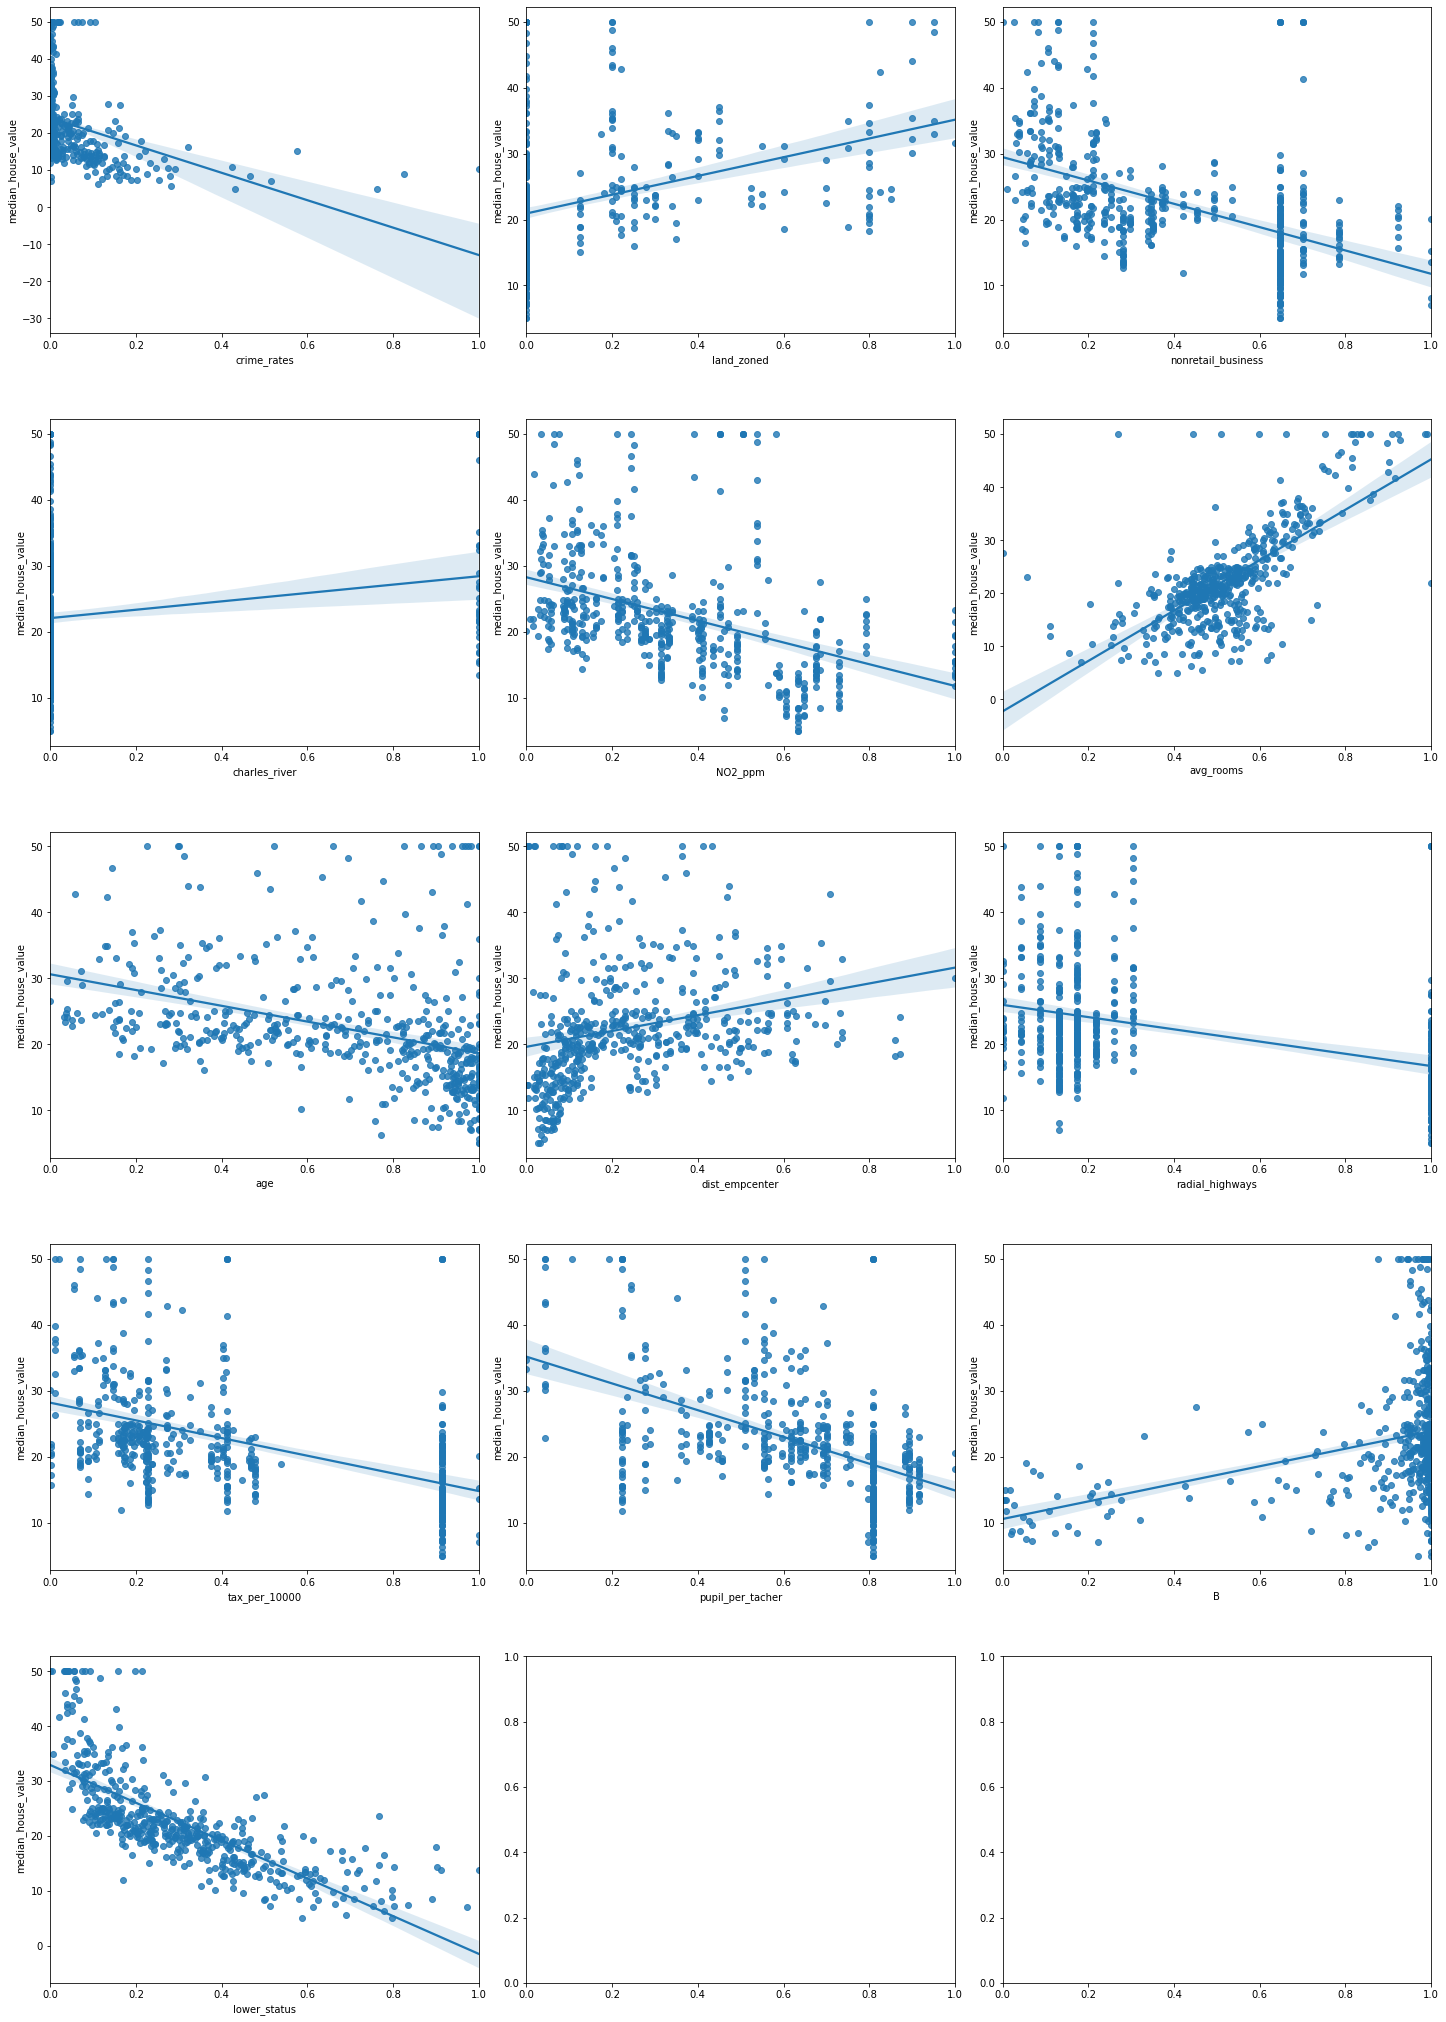

In [28]:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20,28))
axs = axs.flatten()

for i, k in enumerate(cols):
    sns.regplot(y=y, x=X[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)   

Lets remove skewness from X and y by log transforming the data

In [29]:
y = np.log1p(y)

for col in X.columns:
    if np.abs (X[col].skew()) > 0.3:
        X[col] = np.log1p(X[col])

In [34]:
X.skew()

crime_rates           4.128753
land_zoned            1.969749
nonretail_business    0.295022
charles_river         3.405904
NO2_ppm               0.409697
avg_rooms            -0.127789
age                  -0.806758
dist_empcenter        0.734378
radial_highways       0.938857
tax_per_10000         0.511587
pupil_per_tacher     -1.070027
B                    -3.084347
lower_status          0.578045
dtype: float64

Lets try Linear , Ridge regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [39]:
lr = LinearRegression()
kf = KFold(n_splits=10)
minmaxscaler = MinMaxScaler()

X_scaled = MinMaxScaler().fit_transform(X)

scores = cross_val_score(lr, X_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
scores1 = cross_val_score(lr, X_scaled, y, cv=kf, scoring='neg_root_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.19 (+/- 0.10)


In [38]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [41]:
from sklearn.linear_model import Ridge

In [48]:
scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = Ridge()
scores = cross_val_score(l_ridge, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.05 (+/- 0.06)


In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [45]:
model = make_pipeline(PolynomialFeatures(degree=3), Ridge())
scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.04)


    The linear Regression without and with L2 regularization makes significant difference in MSE Error. However Polynomial regression with degree = 3 has better MSE. Let's try some non parametric regression techniques: SVR with kernel rbf, DecisionTreeRegressor, KneighborsRegressor etc

In [49]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(desc_tr, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.06 (+/- 0.06)


In [50]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.07 (+/- 0.05)


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.04 (+/- 0.03)




Let's plot k-fold results to see which model has better distribution of results. Let's have a look at the MSE distribution of these models with k-fold=10


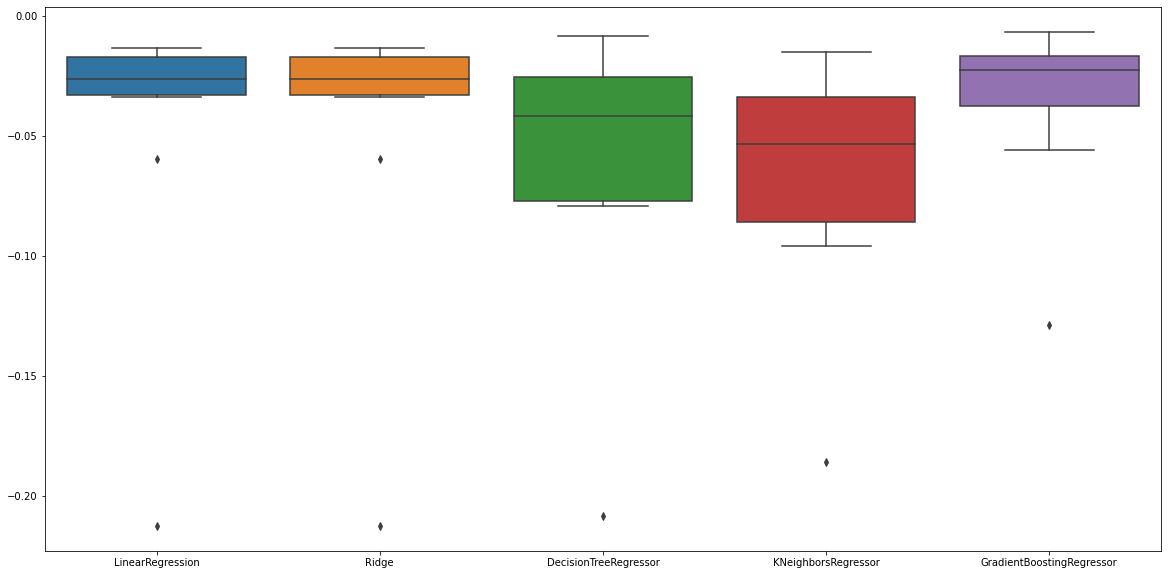

In [52]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)



The models SVR and GradientBoostingRegressor show better performance with MSE: -0.04 (+/- 0.04) and -0.04 (+/- 0.03)